# UIUC Reboot Capstone Project

## Overview
You work for a regional soft drink distribution center that has access to invoice data from convenience stores (invoices.csv), product data (items.csv), and customer reviews (the files in reviews/).

You would like to examine the data for a few features, then plug them into a recommendation engine to see if you can improve sales.

### Loading Data

In [55]:
import pandas as pd
import glob as glob
import zipfile
import numpy as np               # to get unique values from list using numpy.unique 
from datetime import datetime
import re
import matplotlib.pyplot as plt

   
print("Importing CSV Data:\t\t\t", end='')

# ** need to remember to close zf at end **
z = zipfile.ZipFile('data_code.zip') # contains Item & Invoice .csv

# get csv files to work with (omits Titanic files irrelevant to the project)
zipDataCode = [name for name in z.namelist() if name.endswith('.csv') and name.find("titanic") == -1]
print(str(len(zipDataCode)).rjust(10))
for csv in zipDataCode: print(" "*5, csv)

Importing CSV Data:			         2
      data_code/invoice.csv
      data_code/item.csv


### 1. invoices.csv
Table of invoices with various data

In [58]:
# read csv
csvInvoices = pd.read_csv(z.open(zipDataCode[0]))
print(csvInvoices.info(),end="\n\n")
print(csvInvoices.describe().T,end="\n\n\n")
print(csvInvoices.head(),end="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930508 entries, 0 to 930507
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Invoice_id    930508 non-null  object
 1   Date          930508 non-null  object
 2   Item_id       930508 non-null  int64 
 3   Vendor_id     930508 non-null  int64 
 4   Vendor_Name   930508 non-null  object
 5   Store_id      930508 non-null  int64 
 6   Store_Name    930508 non-null  object
 7   Address       930508 non-null  object
 8   City_Name     930508 non-null  object
 9   Zip_Code      930508 non-null  int64 
 10  County_id     930508 non-null  int64 
 11  County_Name   930508 non-null  object
 12  Bottles_Sold  930508 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 92.3+ MB
None

                 count          mean           std      min      25%      50%  \
Item_id       930508.0  46100.761759  42887.410193    101.0  29993.0  41019.0   
Vendor_id     930508.0   

### 2. items.csv
Table of soft drink products with various data

In [59]:
# read csv
csvItems = pd.read_csv(z.open(zipDataCode[1]))
print(csvItems.info(),end="\n\n")
print(csvItems.describe().T,end="\n\n\n")
print(csvItems.head(),end="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4166 entries, 0 to 4165
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_id              4166 non-null   int64  
 1   Item_Description     4166 non-null   object 
 2   Category             4162 non-null   object 
 3   Pack                 4166 non-null   int64  
 4   Bottle_Volume_ml     4166 non-null   float64
 5   Bottle_Cost          4166 non-null   float64
 6   Bottle_Retail_Price  4163 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 228.0+ KB
None

                      count           mean            std     min       25%  \
Item_id              4166.0  154512.392943  292382.354448  101.00  28799.25   
Pack                 4166.0      11.260442      11.913901    1.00      6.00   
Bottle_Volume_ml     4166.0     936.963274    6244.415564    0.00    750.00   
Bottle_Cost          4166.0       3.648721       9.348512 

### 3. reviews.zip
The customer reviews have been stored in separate files with the following format...

```
Customer ID: 6880
Invoice ID: INV-01352200015
Product Rating: 2/5
```

In [60]:
def formatReviewForCSV (f):
    dictFile = {'Filename' : f}

    with zf.open(f) as fReview:
        for line in fReview.readlines():
            (key,val) = line.decode("utf-8").strip().split(":")
            dictFile[(key.strip()).capitalize().replace(" ", "_")] = val.strip()
    # close your data file
    fReview.close()
    
    return dictFile

##########


print(("Start: ").rjust(10), datetime.now(), end="\n\n")
print("\tCompiling Product Reviews:\t\t\t", end='')

# TODO: Check timestamp on zip to see if it's changed since last end time to prevent unnecessary rerun?
zf = zipfile.ZipFile('reviews.zip')
datReviews = [filename for filename in zf.namelist() if filename.endswith(".dat") and filename.startswith("reviews/review")]
print(len(datReviews))

print("\tCreating dataframe...",end="\n\n")
csvReviews = pd.DataFrame(index=None)           # Initialize empty dataframe
for f in datReviews:
    csvReviews = csvReviews.append(formatReviewForCSV(f), ignore_index=True)

print(csvReviews.info(),end="\n\n")
print(csvReviews.describe().T,end="\n\n")
print("\n",csvReviews.sort_values(by=['Filename']).head(),end="\n\n")
print((">> End: ").rjust(10), datetime.now(),end="\n\n")

   Start:  2021-03-26 04:37:29.208104

	Compiling Product Reviews:			50000
	Creating dataframe...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_id     50000 non-null  object
 1   Filename        50000 non-null  object
 2   Invoice_id      50000 non-null  object
 3   Product_rating  50000 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB
None

                count unique                      top   freq
Customer_id     50000   7811                     4870     27
Filename        50000  50000  reviews/review22116.dat      1
Invoice_id      50000  48696          INV-07914000013      3
Product_rating  50000      5                      1/5  10120


       Customer_id                 Filename    Invoice_id Product_rating
25000        2383  reviews/review00000.dat  S11999300004            2/5
42001        9192  reviews/revi

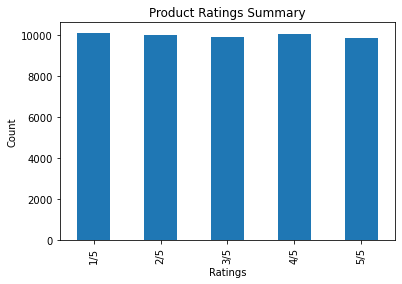

In [52]:
plt.figure()
plt.title('Product Ratings Summary')
(csvReviews['Product_rating']).value_counts().sort_index().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
# closing zip files
zf.close()
z.close()